In [7]:
# Here we are going to find out the best food in the market! Let's import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import os



In [12]:
# Step 1: Let's make a table called ref_value. I have already made it in SQL and imported in my database. The nutritional values were found on the internet.
# Let's import our tables:

database_path = 'sqlite:///C:/Users/Vartotojas/Desktop/programavimas/baigiamasis_darbas/db/db.sqlite3'

engine = create_engine(database_path)

query_food = 'SELECT * FROM fruits_vegetables'
query_values = 'SELECT * FROM refvalue'

with engine.connect() as conn:
    df_food = pd.read_sql_query(query_food, conn)
    df_ref = pd.read_sql_query(query_values, conn)

df_food.head()
df_ref.head()

,id,element,ref_value
0,1,vit_a,800
1,2,vit_c,80
2,3,vit_e,12
3,4,mg,375
4,5,zn,10


In [13]:
# Step 2: I need to get information abot every element's reference nutritional value. Let's do some math!
df = pd.DataFrame(columns=["food_name", "food_group", "ref_value", "ref_mg_100g", "ref_zn_100g", "ref_fa_100g", "ref_p_100g", "ref_vitA_100g",
                           "ref_vitC_100g", "ref_vitE_100g", "ref_fiber_100g"])

In [15]:
df_ref

,id,element,ref_value
0,1,vit_a,800
1,2,vit_c,80
2,3,vit_e,12
3,4,mg,375
4,5,zn,10
5,6,p,700
6,7,fa,200
7,8,fiber,28
8,9,energy,2000


In [16]:
df_food.head()

,food_group_id,name,id,long_desc,kcal_in_100g,mg_in_mg,zn_in_mg,fa_in_mcg,p_in_mg,vitamin_a_in_mcg,...,fiber_in_g,fiber_in_100kcal,mg_mg_in_100kcal,zn_mg_in_100kcal,fa_mgc_in_100kcal,vitamin_a_in_mcg_100kcal,vitamin_c_in_mcg_100kcal,vitamin_c_in_mg_100kcal,vitamin_e_in_mg_100kcal,p_mg_in_100kcal
0,900,Fruits and Fruit Juices,9009,"Apples, dehydrated (low moisture), sulfured, u...",346.0,22.0,0.29,0.0,55.0,4.0,...,12.4,3.583815,6.358382,0.083815,0,1.156069,0.635838,0.635838,0.216763,15.895954
1,900,Fruits and Fruit Juices,9011,"Apples, dried, sulfured, uncooked",243.0,16.0,0.20,0.0,38.0,0.0,...,8.7,3.580247,6.584362,0.082305,0,0.000000,1.604938,1.604938,0.218107,15.637860
2,900,Fruits and Fruit Juices,9012,"Apples, dried, sulfured, stewed, without added...",57.0,4.0,0.05,0.0,9.0,1.0,...,2.0,3.508772,7.017544,0.087719,0,1.754386,1.754386,1.754386,0.210526,15.789474
3,900,Fruits and Fruit Juices,9032,"Apricots, dried, sulfured, uncooked",241.0,32.0,0.39,0.0,71.0,180.0,...,7.3,3.029046,13.278008,0.161826,0,74.688797,0.414938,0.414938,1.796680,29.460581
4,900,Fruits and Fruit Juices,9033,"Apricots, dried, sulfured, stewed, without add...",85.0,11.0,0.14,0.0,25.0,64.0,...,2.6,3.058824,12.941176,0.164706,0,75.294118,0.352941,0.352941,1.800000,29.411765


In [25]:
# Let's add a column for nutritional referntial value in 100g of product

nutritional_value = df_ref.loc[df_ref['element'] == "mg", 'ref_value'].values[0]
df_food["ref_mg_100g"] = (df_food["mg_in_mg"] / nutritional_value).round(4)

nutritional_value = df_ref.loc[df_ref['element'] == "zn", 'ref_value'].values[0]
df_food["ref_zn_100g"] = (df_food["zn_in_mg"] / nutritional_value).round(4)

nutritional_value = df_ref.loc[df_ref['element'] == "p", 'ref_value'].values[0]
df_food["ref_p_100g"] = (df_food["p_in_mg"] / nutritional_value).round(4)

nutritional_value = df_ref.loc[df_ref['element'] == "p", 'ref_value'].values[0]
df_food["ref_p_100g"] = (df_food["p_in_mg"] / nutritional_value).round(4)

nutritional_value = df_ref.loc[df_ref['element'] == "fa", 'ref_value'].values[0]
df_food["ref_fa_100g"] = (df_food["fa_in_mcg"] / nutritional_value).round(4)

nutritional_value = df_ref.loc[df_ref['element'] == "fa", 'ref_value'].values[0]
df_food["ref_fa_100g"] = (df_food["fa_in_mcg"] / nutritional_value).round(4)

nutritional_value = df_ref.loc[df_ref['element'] == "vit_a", 'ref_value'].values[0]
df_food["ref_vitA_100g"] = (df_food["vitamin_a_in_mcg"] / nutritional_value).round(4)

nutritional_value = df_ref.loc[df_ref['element'] == "vit_c", 'ref_value'].values[0]
df_food["ref_vitC_100g"] = (df_food["vitamin_c_in_mg"] / nutritional_value).round(4)

nutritional_value = df_ref.loc[df_ref['element'] == "vit_e", 'ref_value'].values[0]
df_food["ref_vitE_100g"] = (df_food["vitamin_e_in_mg"] / nutritional_value).round(4)


df_food.head()





,food_group_id,name,id,long_desc,kcal_in_100g,mg_in_mg,zn_in_mg,fa_in_mcg,p_in_mg,vitamin_a_in_mcg,...,vitamin_c_in_mg_100kcal,vitamin_e_in_mg_100kcal,p_mg_in_100kcal,ref_mg_100g,ref_zn_100g,ref_p_100g,ref_fa_100g,ref_vitA_100g,ref_vitC_100g,ref_vitE_100g
0,900,Fruits and Fruit Juices,9009,"Apples, dehydrated (low moisture), sulfured, u...",346.0,22.0,0.29,0.0,55.0,4.0,...,0.635838,0.216763,15.895954,0.0587,0.029,0.0786,0.0,0.0050,0.0275,0.0625
1,900,Fruits and Fruit Juices,9011,"Apples, dried, sulfured, uncooked",243.0,16.0,0.20,0.0,38.0,0.0,...,1.604938,0.218107,15.637860,0.0427,0.020,0.0543,0.0,0.0000,0.0488,0.0442
2,900,Fruits and Fruit Juices,9012,"Apples, dried, sulfured, stewed, without added...",57.0,4.0,0.05,0.0,9.0,1.0,...,1.754386,0.210526,15.789474,0.0107,0.005,0.0129,0.0,0.0012,0.0125,0.0100
3,900,Fruits and Fruit Juices,9032,"Apricots, dried, sulfured, uncooked",241.0,32.0,0.39,0.0,71.0,180.0,...,0.414938,1.796680,29.460581,0.0853,0.039,0.1014,0.0,0.2250,0.0125,0.3608
4,900,Fruits and Fruit Juices,9033,"Apricots, dried, sulfured, stewed, without add...",85.0,11.0,0.14,0.0,25.0,64.0,...,0.352941,1.800000,29.411765,0.0293,0.014,0.0357,0.0,0.0800,0.0038,0.1275


In [29]:
# Let's add a column for nutritional referntial value in 100kcal of product
nutritional_value = df_ref.loc[df_ref['element'] == "mg", 'ref_value'].values[0]
df_food["ref_mg_100kcal"] = (df_food["mg_mg_in_100kcal"] / nutritional_value).round(4)

nutritional_value = df_ref.loc[df_ref['element'] == "zn", 'ref_value'].values[0]
df_food["ref_zn_100kcal"] = (df_food["zn_mg_in_100kcal"] / nutritional_value).round(4)

nutritional_value = df_ref.loc[df_ref['element'] == "p", 'ref_value'].values[0]
df_food["ref_p_100kcal"] = (df_food["p_mg_in_100kcal"] / nutritional_value).round(4)

nutritional_value = df_ref.loc[df_ref['element'] == "p", 'ref_value'].values[0]
df_food["ref_p_100kcal"] = (df_food["p_mg_in_100kcal"] / nutritional_value).round(4)


nutritional_value = df_ref.loc[df_ref['element'] == "fa", 'ref_value'].values[0]
df_food["ref_fa_100kcal"] = (df_food["fa_mgc_in_100kcal"] / nutritional_value).round(4)

nutritional_value = df_ref.loc[df_ref['element'] == "vit_a", 'ref_value'].values[0]
df_food["ref_vitA_100kcal"] = (df_food["vitamin_a_in_mcg_100kcal"] / nutritional_value).round(4)

nutritional_value = df_ref.loc[df_ref['element'] == "vit_c", 'ref_value'].values[0]
df_food["ref_vitC_100kcal"] = (df_food["vitamin_c_in_mg_100kcal"] / nutritional_value).round(4)

nutritional_value = df_ref.loc[df_ref['element'] == "vit_e", 'ref_value'].values[0]
df_food["ref_vitE_100kcal"] = (df_food["vitamin_e_in_mg_100kcal"] / nutritional_value).round(4)


df_food.head()


,food_group_id,name,id,long_desc,kcal_in_100g,mg_in_mg,zn_in_mg,fa_in_mcg,p_in_mg,vitamin_a_in_mcg,...,ref_vitA_100g,ref_vitC_100g,ref_vitE_100g,ref_mg_100kcal,ref_zn_100kcal,ref_p_100kcal,ref_fa_100kcal,ref_vitA_100kcal,ref_vitC_100kcal,ref_vitE_100kcal
0,900,Fruits and Fruit Juices,9009,"Apples, dehydrated (low moisture), sulfured, u...",346.0,22.0,0.29,0.0,55.0,4.0,...,0.0050,0.0275,0.0625,0.0170,0.0084,0.0227,0.0,0.0014,0.0079,0.0181
1,900,Fruits and Fruit Juices,9011,"Apples, dried, sulfured, uncooked",243.0,16.0,0.20,0.0,38.0,0.0,...,0.0000,0.0488,0.0442,0.0176,0.0082,0.0223,0.0,0.0000,0.0201,0.0182
2,900,Fruits and Fruit Juices,9012,"Apples, dried, sulfured, stewed, without added...",57.0,4.0,0.05,0.0,9.0,1.0,...,0.0012,0.0125,0.0100,0.0187,0.0088,0.0226,0.0,0.0022,0.0219,0.0175
3,900,Fruits and Fruit Juices,9032,"Apricots, dried, sulfured, uncooked",241.0,32.0,0.39,0.0,71.0,180.0,...,0.2250,0.0125,0.3608,0.0354,0.0162,0.0421,0.0,0.0934,0.0052,0.1497
4,900,Fruits and Fruit Juices,9033,"Apricots, dried, sulfured, stewed, without add...",85.0,11.0,0.14,0.0,25.0,64.0,...,0.0800,0.0038,0.1275,0.0345,0.0165,0.0420,0.0,0.0941,0.0044,0.1500


In [44]:
# Now let's sort out values. Here is top magnesium:
df_mg = df_food[["long_desc", "ref_mg_100g"]].sort_values(by='ref_mg_100g', ascending=False).head(20)
df_mg["g, %"] = df_mg["ref_mg_100g"] * 100
print(df_mg)


                                             long_desc  ref_mg_100g   g, %
294                            Seaweed, irishmoss, raw       0.3840  38.40
295                                 Seaweed, kelp, raw       0.3227  32.27
5                Bananas, dehydrated, or banana powder       0.2880  28.80
316                               Seaweed, wakame, raw       0.2853  28.53
167  Balsam-pear (bitter gourd), leafy tips, cooked...       0.2507  25.07
89   Balsam-pear (bitter gourd), leafy tips, cooked...       0.2507  25.07
78                                      Tamarinds, raw       0.2453  24.53
139     Spinach, cooked, boiled, drained, without salt       0.2320  23.20
215        Spinach, cooked, boiled, drained, with salt       0.2320  23.20
184   Chard, swiss, cooked, boiled, drained, with salt       0.2293  22.93
107  Chard, swiss, cooked, boiled, drained, without...       0.2293  22.93
140  Spinach, frozen, chopped or leaf, cooked, boil...       0.2187  21.87
216  Spinach, frozen, cho

In [45]:
# Top zinc:
df_zn = df_food[["long_desc", "ref_zn_100g"]].sort_values(by='ref_zn_100g', ascending=False).head(20)
df_zn["g, %"] = df_zn["ref_zn_100g"] * 100
print(df_zn)


                                             long_desc  ref_zn_100g  g, %
333                                Hearts of palm, raw        0.373  37.3
294                            Seaweed, irishmoss, raw        0.195  19.5
295                                 Seaweed, kelp, raw        0.123  12.3
269                                        Garlic, raw        0.116  11.6
243                                 Bamboo shoots, raw        0.110  11.0
296                                Seaweed, laver, raw        0.105  10.5
240                       Alfalfa seeds, sprouted, raw        0.092   9.2
117  Jute, potherb, cooked, boiled, drained, withou...        0.079   7.9
268                                        Endive, raw        0.079   7.9
193  Jute, potherb, cooked, boiled, drained, with salt        0.079   7.9
90   Balsam-pear (bitter gourd), pods, cooked, boil...        0.077   7.7
168  Balsam-pear (bitter gourd), pods, cooked, boil...        0.077   7.7
246                                 Br

In [46]:
# Top folic acid:
df_fa = df_food[["long_desc", "ref_fa_100g"]].sort_values(by='ref_fa_100g', ascending=False).head(20)
df_fa["g, %"] = df_fa["ref_fa_100g"] * 100
print(df_fa)

                                             long_desc  ref_fa_100g  g, %
0    Apples, dehydrated (low moisture), sulfured, u...          0.0   0.0
229             Tomatoes, red, ripe, cooked, with salt          0.0   0.0
227  Sweet potato, cooked, boiled, without skin, wi...          0.0   0.0
226  Succotash, (corn and limas), frozen, cooked, b...          0.0   0.0
225  Squash, winter, hubbard, cooked, boiled, mashe...          0.0   0.0
224  Squash, winter, butternut, cooked, baked, with...          0.0   0.0
223  Squash, winter, all varieties, cooked, baked, ...          0.0   0.0
222  Squash, summer, zucchini, includes skin, froze...          0.0   0.0
221  Squash, summer, zucchini, includes skin, cooke...          0.0   0.0
220  Squash, summer, scallop, cooked, boiled, drain...          0.0   0.0
219  Squash, summer, crookneck and straightneck, fr...          0.0   0.0
218  Squash, summer, crookneck and straightneck, co...          0.0   0.0
217  Squash, summer, all varieties, co

In [47]:
# Top phosphor:
df_p = df_food[["long_desc", "ref_p_100g"]].sort_values(by='ref_p_100g', ascending=False).head(20)
df_p["g, %"] = df_p["ref_p_100g"] * 100
print(df_p)

                                             long_desc  ref_p_100g   g, %
12                                      Litchis, dried      0.2586  25.86
294                            Seaweed, irishmoss, raw      0.2243  22.43
269                                        Garlic, raw      0.2186  21.86
333                                Hearts of palm, raw      0.2000  20.00
8                               Currants, zante, dried      0.1786  17.86
14                  Peaches, dried, sulfured, uncooked      0.1700  17.00
72                            Raisins, golden seedless      0.1643  16.43
257                                      Celeriac, raw      0.1643  16.43
78                                      Tamarinds, raw      0.1614  16.14
73                                   Raisins, seedless      0.1443  14.43
175   Burdock root, cooked, boiled, drained, with salt      0.1329  13.29
98   Burdock root, cooked, boiled, drained, without...      0.1329  13.29
272                                   

In [48]:
# Top vitamin A:
df_vitA = df_food[["long_desc", "ref_vitA_100g"]].sort_values(by='ref_vitA_100g', ascending=False).head(20)
df_vitA["g, %"] = df_vitA["ref_vitA_100g"] * 100
print(df_vitA)

                                             long_desc  ref_vitA_100g    g, %
152  Sweet potato, frozen, cooked, baked, without salt         1.3038  130.38
150  Sweet potato, cooked, baked in skin, flesh, wi...         1.2012  120.12
102     Carrots, cooked, boiled, drained, without salt         1.0650  106.50
179        Carrots, cooked, boiled, drained, with salt         1.0650  106.50
103  Carrots, frozen, cooked, boiled, drained, with...         1.0575  105.75
180  Carrots, frozen, cooked, boiled, drained, with...         1.0575  105.75
254                                       Carrots, raw         1.0438  104.38
151         Sweet potato, cooked, boiled, without skin         0.9838   98.38
227  Sweet potato, cooked, boiled, without skin, wi...         0.9838   98.38
195   Kale, frozen, cooked, boiled, drained, with salt         0.9188   91.88
119  Kale, frozen, cooked, boiled, drained, without...         0.9188   91.88
304                      Sweet potato, raw, unprepared         0

In [49]:
# Top vitamin C:
df_vitC = df_food[["long_desc", "ref_vitC_100g"]].sort_values(by='ref_vitC_100g', ascending=False).head(20)
df_vitC["g, %"] = df_vitC["ref_vitC_100g"] * 100
print(df_vitC)

                                             long_desc  ref_vitC_100g    g, %
317                     Peppers, hot chili, green, raw         3.0312  303.12
46                                 Guavas, common, raw         2.8538  285.38
12                                      Litchis, dried         2.2875  228.75
205  Peppers, sweet, red, cooked, boiled, drained, ...         2.1375  213.75
206  Peppers, sweet, red, cooked, boiled, drained, ...         2.1375  213.75
84                      Kiwifruit, ZESPRI SunGold, raw         2.0163  201.63
319                       Peppers, hot chili, red, raw         1.7962  179.62
320                           Peppers, sweet, red, raw         1.5962  159.62
272                                          Kale, raw         1.5000  150.00
330                             Peppers, jalapeno, raw         1.4825  148.25
331                            Peppers, hungarian, raw         1.1613  116.13
48                               Kiwifruit, green, raw         1

In [50]:
# Top vitamin E:
df_vitE = df_food[["long_desc", "ref_vitE_100g"]].sort_values(by='ref_vitE_100g', ascending=False).head(20)
df_vitE["g, %"] = df_vitE["ref_vitE_100g"] * 100
print(df_vitE)

                                             long_desc  ref_vitE_100g   g, %
3                  Apricots, dried, sulfured, uncooked         0.3608  36.08
13                             Mango, dried, sweetened         0.3350  33.50
330                             Peppers, jalapeno, raw         0.2983  29.83
140  Spinach, frozen, chopped or leaf, cooked, boil...         0.2950  29.50
216  Spinach, frozen, chopped or leaf, cooked, boil...         0.2950  29.50
153                         Taro, cooked, without salt         0.2442  24.42
228                            Taro, cooked, with salt         0.2442  24.42
27                              Avocados, raw, Florida         0.2217  22.17
95                               Broccoli raab, cooked         0.2108  21.08
109  Chrysanthemum, garland, cooked, boiled, draine...         0.2083  20.83
186  Chrysanthemum, garland, cooked, boiled, draine...         0.2083  20.83
305                                          Taro, raw         0.1983  19.83

In [52]:
# Now let's see how everything changes when we use calories instead of 100 grams.

df_mg_kcal = df_food[["long_desc", "ref_mg_100kcal"]].sort_values(by='ref_mg_100kcal', ascending=False).head(20)
df_mg_kcal["kcal, %"] = df_mg_kcal["ref_mg_100kcal"] * 100
print(df_mg_kcal)


                                             long_desc  ref_mg_100kcal  \
107  Chard, swiss, cooked, boiled, drained, without...          1.1467   
184   Chard, swiss, cooked, boiled, drained, with salt          1.1467   
259                                  Chard, swiss, raw          1.1368   
139     Spinach, cooked, boiled, drained, without salt          1.0087   
215        Spinach, cooked, boiled, drained, with salt          1.0087   
297                                       Spinach, raw          0.9159   
326                                       Nopales, raw          0.8667   
237                      Nopales, cooked, without salt          0.8356   
294                            Seaweed, irishmoss, raw          0.7837   
167  Balsam-pear (bitter gourd), leafy tips, cooked...          0.7833   
295                                 Seaweed, kelp, raw          0.7504   
89   Balsam-pear (bitter gourd), leafy tips, cooked...          0.7373   
293                                 Se

In [53]:
# zinc
df_zn_kcal = df_food[["long_desc", "ref_zn_100kcal"]].sort_values(by='ref_zn_100kcal', ascending=False).head(20)
df_zn_kcal["kcal, %"] = df_zn_kcal["ref_zn_100kcal"] * 100
print(df_zn_kcal)

                                             long_desc  ref_zn_100kcal  \
233  Waxgourd, (chinese preserving melon), cooked, ...          0.5364   
268                                        Endive, raw          0.4647   
158  Waxgourd, (chinese preserving melon), cooked, ...          0.4214   
243                                 Bamboo shoots, raw          0.4074   
168  Balsam-pear (bitter gourd), pods, cooked, boil...          0.4053   
90   Balsam-pear (bitter gourd), pods, cooked, boil...          0.4053   
240                       Alfalfa seeds, sprouted, raw          0.4000   
294                            Seaweed, irishmoss, raw          0.3980   
260                                Chayote, fruit, raw          0.3895   
116   Escarole, cooked, boiled, drained, no salt added          0.3632   
246                                 Broccoli raab, raw          0.3500   
215        Spinach, cooked, boiled, drained, with salt          0.3304   
139     Spinach, cooked, boiled, drain

In [54]:
# folic acid
df_fa_kcal = df_food[["long_desc", "ref_fa_100kcal"]].sort_values(by='ref_fa_100kcal', ascending=False).head(20)
df_fa_kcal["kcal, %"] = df_fa_kcal["ref_fa_100kcal"] * 100
print(df_fa_kcal)

                                             long_desc  ref_fa_100kcal  \
0    Apples, dehydrated (low moisture), sulfured, u...             0.0   
229             Tomatoes, red, ripe, cooked, with salt             0.0   
227  Sweet potato, cooked, boiled, without skin, wi...             0.0   
226  Succotash, (corn and limas), frozen, cooked, b...             0.0   
225  Squash, winter, hubbard, cooked, boiled, mashe...             0.0   
224  Squash, winter, butternut, cooked, baked, with...             0.0   
223  Squash, winter, all varieties, cooked, baked, ...             0.0   
222  Squash, summer, zucchini, includes skin, froze...             0.0   
221  Squash, summer, zucchini, includes skin, cooke...             0.0   
220  Squash, summer, scallop, cooked, boiled, drain...             0.0   
219  Squash, summer, crookneck and straightneck, fr...             0.0   
218  Squash, summer, crookneck and straightneck, co...             0.0   
217  Squash, summer, all varieties, co

In [55]:
# phosphor
df_p_kcal = df_food[["long_desc", "ref_p_100kcal"]].sort_values(by='ref_p_100kcal', ascending=False).head(20)
df_p_kcal["kcal, %"] = df_p_kcal["ref_p_100kcal"] * 100
print(df_p_kcal)

                                             long_desc  ref_p_100kcal  kcal, %
310                                    Watercress, raw         0.7792    77.92
246                                 Broccoli raab, raw         0.4740    47.40
294                            Seaweed, irishmoss, raw         0.4577    45.77
240                       Alfalfa seeds, sprouted, raw         0.4348    43.48
252                   Cabbage, chinese (pak-choi), raw         0.4066    40.66
257                                      Celeriac, raw         0.3912    39.12
166  Asparagus, frozen, cooked, boiled, drained, wi...         0.3889    38.89
88   Asparagus, frozen, cooked, boiled, drained, wi...         0.3889    38.89
242                                     Asparagus, raw         0.3714    37.14
275  Lettuce, butterhead (includes boston and bibb ...         0.3626    36.26
95                               Broccoli raab, cooked         0.3550    35.50
144  Squash, summer, zucchini, includes skin, cooke.

In [56]:
# vitamin A
df_vitA_kcal = df_food[["long_desc", "ref_vitA_100kcal"]].sort_values(by='ref_vitA_100kcal', ascending=False).head(20)
df_vitA_kcal["kcal, %"] = df_vitA_kcal["ref_vitA_100kcal"] * 100
print(df_vitA_kcal)

                                             long_desc  ref_vitA_100kcal  \
276                       Lettuce, cos or romaine, raw            3.2059   
278                           Lettuce, green leaf, raw            3.0833   
195   Kale, frozen, cooked, boiled, drained, with salt            3.0625   
119  Kale, frozen, cooked, boiled, drained, without...            3.0625   
102     Carrots, cooked, boiled, drained, without salt            3.0429   
179        Carrots, cooked, boiled, drained, with salt            3.0429   
194           Kale, cooked, boiled, drained, with salt            3.0402   
118        Kale, cooked, boiled, drained, without salt            3.0402   
279                             Lettuce, red leaf, raw            2.9297   
180  Carrots, frozen, cooked, boiled, drained, with...            2.8581   
103  Carrots, frozen, cooked, boiled, drained, with...            2.8581   
139     Spinach, cooked, boiled, drained, without salt            2.8478   
215        S

In [57]:
# vitamin C
df_vitC_kcal = df_food[["long_desc", "ref_vitC_100kcal"]].sort_values(by='ref_vitC_100kcal', ascending=False).head(20)
df_vitC_kcal["kcal, %"] = df_vitC_kcal["ref_vitC_100kcal"] * 100
print(df_vitC_kcal)

                                             long_desc  ref_vitC_100kcal  \
206  Peppers, sweet, red, cooked, boiled, drained, ...            8.2212   
205  Peppers, sweet, red, cooked, boiled, drained, ...            7.6339   
317                     Peppers, hot chili, green, raw            7.5781   
320                           Peppers, sweet, red, raw            5.1492   
207  Pokeberry shoots, (poke), cooked, boiled, drai...            5.1250   
131  Pokeberry shoots, (poke), cooked, boiled, drai...            5.1250   
330                             Peppers, jalapeno, raw            5.1121   
284                         Peppers, sweet, green, raw            5.0250   
310                                    Watercress, raw            4.8864   
319                       Peppers, hot chili, red, raw            4.4906   
252                   Cabbage, chinese (pak-choi), raw            4.3269   
46                                 Guavas, common, raw            4.1967   
331         

In [58]:
# vitamin E
df_vitE_kcal = df_food[["long_desc", "ref_vitE_100kcal"]].sort_values(by='ref_vitE_100kcal', ascending=False).head(20)
df_vitE_kcal["kcal, %"] = df_vitE_kcal["ref_vitE_100kcal"] * 100
print(df_vitE_kcal)

                                             long_desc  ref_vitE_100kcal  \
186  Chrysanthemum, garland, cooked, boiled, draine...            1.0417   
109  Chrysanthemum, garland, cooked, boiled, draine...            1.0417   
330                             Peppers, jalapeno, raw            1.0287   
140  Spinach, frozen, chopped or leaf, cooked, boil...            0.8676   
216  Spinach, frozen, chopped or leaf, cooked, boil...            0.8676   
259                                  Chard, swiss, raw            0.8289   
322                                     Radicchio, raw            0.8188   
184   Chard, swiss, cooked, boiled, drained, with salt            0.7875   
107  Chard, swiss, cooked, boiled, drained, without...            0.7875   
310                                    Watercress, raw            0.7576   
139     Spinach, cooked, boiled, drained, without salt            0.7536   
215        Spinach, cooked, boiled, drained, with salt            0.7536   
297         

In [73]:
# Now we have all the relevant information, lets calculate best food ever!
kcal_columns = ["ref_mg_100kcal", "ref_zn_100kcal", "ref_fa_100kcal", "ref_p_100kcal", "ref_vitA_100kcal", 
                "ref_vitC_100kcal", "ref_vitE_100kcal"]
def filter_values(value):
    return min(value, 1)

# Apply the custom function to the specified columns
df_food[kcal_columns] = df_food[kcal_columns].applymap(filter_values)

# Display the updated DataFrame

df_food["all_100kcal"] = df_food[kcal_columns].sum(axis=1)
df_food[["long_desc", "all_100kcal"]].sort_values(by='all_100kcal', ascending=False).head(20)

C:\Users\Vartotojas\AppData\Local\Temp\ipykernel_16548\1975749043.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_food[kcal_columns] = df_food[kcal_columns].applymap(filter_values)


,long_desc,all_100kcal
259,"Chard, swiss, raw",4.3643
184,"Chard, swiss, cooked, boiled, drained, with salt",4.1882
107,"Chard, swiss, cooked, boiled, drained, without...",4.1882
297,"Spinach, raw",4.1861
310,"Watercress, raw",4.1459
215,"Spinach, cooked, boiled, drained, with salt",3.9644
139,"Spinach, cooked, boiled, drained, without salt",3.9644
186,"Chrysanthemum, garland, cooked, boiled, draine...",3.4533
109,"Chrysanthemum, garland, cooked, boiled, draine...",3.4533
246,"Broccoli raab, raw",3.4486


In [72]:
# Now we have all the relevant information, lets calculate best food ever! in 100 grams
g_columns = ["ref_mg_100g", "ref_zn_100g", "ref_fa_100g", "ref_p_100g", "ref_vitA_100g", 
                "ref_vitC_100g", "ref_vitE_100g"]
def filter_values(value):
    return min(value, 1)

# Apply the custom function to the specified columns
df_food[g_columns] = df_food[g_columns].applymap(filter_values)

# Display the updated DataFrame

df_food["all_100g"] = df_food[g_columns].sum(axis=1)
df_food[["long_desc", "all_100g"]].sort_values(by='all_100g', ascending=False).head(20)

C:\Users\Vartotojas\AppData\Local\Temp\ipykernel_16548\3556731620.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_food[g_columns] = df_food[g_columns].applymap(filter_values)


,long_desc,all_100g
272,"Kale, raw",2.0660
131,"Pokeberry shoots, (poke), cooked, boiled, drai...",1.7180
207,"Pokeberry shoots, (poke), cooked, boiled, drai...",1.7180
264,"Cress, garden, raw",1.5862
194,"Kale, cooked, boiled, drained, with salt",1.5465
118,"Kale, cooked, boiled, drained, without salt",1.5465
150,"Sweet potato, cooked, baked in skin, flesh, wi...",1.4853
330,"Peppers, jalapeno, raw",1.4569
297,"Spinach, raw",1.4404
12,"Litchis, dried",1.4244


In [90]:
# Let's make some graphs with each food group and nutritional value on vitamins.
# First, import our food group tables.

query_fruits_raw = 'SELECT * FROM fruits_raw'
query_fruits_dried = 'SELECT * FROM fruits_dried'
query_vegies_raw = 'SELECT * FROM vegetables_raw'
query_vegies_cooked = 'SELECT * FROM vegetables_cooked'

with engine.connect() as conn:
    df_fruits_raw = pd.read_sql_query(query_fruits_raw, conn)
    df_fruits_dried = pd.read_sql_query(query_fruits_dried, conn)
    df_vegies_raw = pd.read_sql_query(query_vegies_raw, conn)
    df_vegies_cooked = pd.read_sql_query(query_vegies_cooked, conn)


<Figure size 600x300 with 0 Axes>

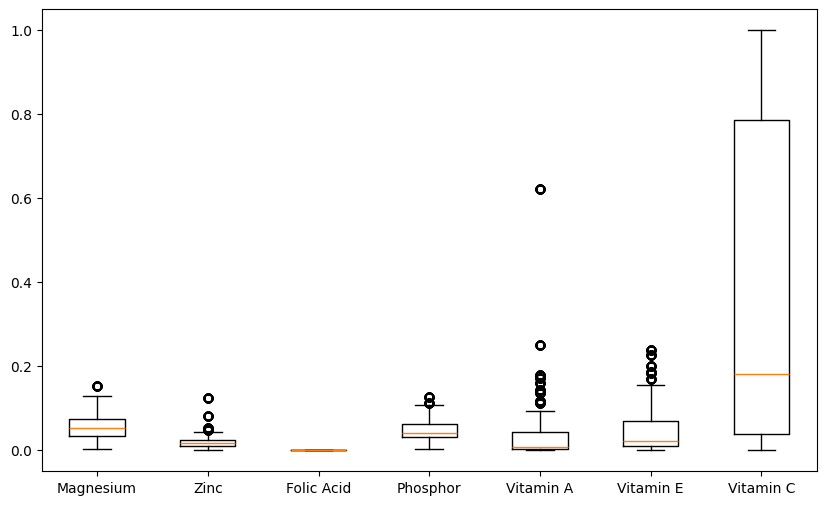

In [94]:
# Nutritional value of raw fruits in 100kcal

df_fr_join = pd.merge(df_fruits_raw, df_food, on='food_group_id', how='left')
data = df_fr_join[['ref_mg_100kcal', 'ref_zn_100kcal', 'ref_fa_100kcal', 'ref_p_100kcal', 'ref_vitA_100kcal', 'ref_vitE_100kcal', 'ref_vitC_100kcal']]

fig = plt.figure(figsize =(6, 3))
 
# Creating axes instance
labels = ['Magnesium', 'Zinc', 'Folic Acid', 'Phosphor', 'Vitamin A', 'Vitamin E', 'Vitamin C']
fig, ax = plt.subplots(figsize=(10, 6))
 
# Creating plot
bp = ax.boxplot(data, labels=labels)
 
# show plot
plt.show()

<Figure size 600x300 with 0 Axes>

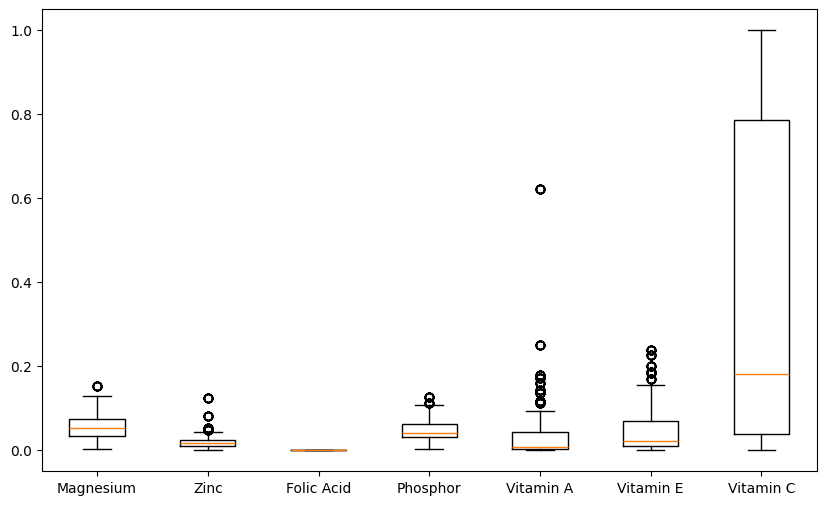

In [95]:
# Nutritional value of dried fruits in 100kcal

df_fd_join = pd.merge(df_fruits_dried, df_food, on='food_group_id', how='left')
data = df_fd_join[['ref_mg_100kcal', 'ref_zn_100kcal', 'ref_fa_100kcal', 'ref_p_100kcal', 'ref_vitA_100kcal', 'ref_vitE_100kcal', 'ref_vitC_100kcal']]

fig = plt.figure(figsize =(6, 3))
 
# Creating axes instance
labels = ['Magnesium', 'Zinc', 'Folic Acid', 'Phosphor', 'Vitamin A', 'Vitamin E', 'Vitamin C']
fig, ax = plt.subplots(figsize=(10, 6))
 
# Creating plot
bp = ax.boxplot(data, labels=labels)
 
# show plot
plt.show()

<Figure size 600x300 with 0 Axes>

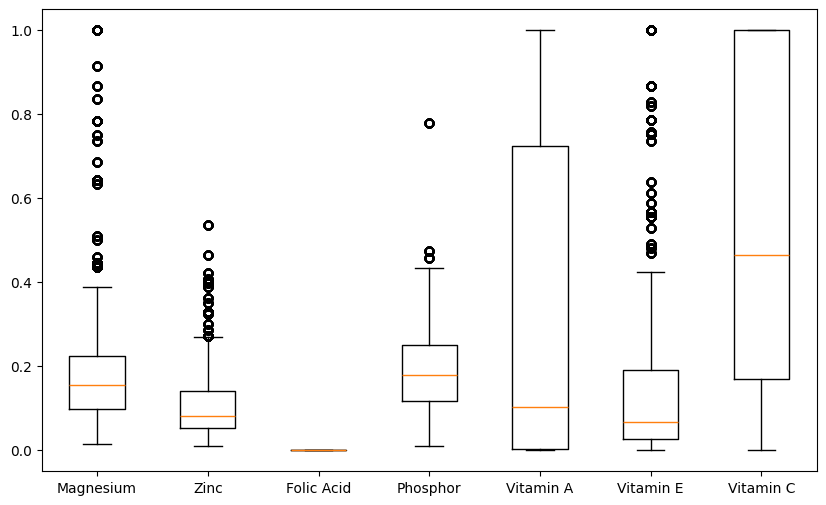

In [88]:
# Nutritional value of raw vegetables in 100kcal

df_vr_join = pd.merge(df_vegies_raw, df_food, on='food_group_id', how='left')
data = df_vr_join[['ref_mg_100kcal', 'ref_zn_100kcal', 'ref_fa_100kcal', 'ref_p_100kcal', 'ref_vitA_100kcal', 'ref_vitE_100kcal', 'ref_vitC_100kcal']]

fig = plt.figure(figsize =(6, 3))
 
# Creating axes instance
labels = ['Magnesium', 'Zinc', 'Folic Acid', 'Phosphor', 'Vitamin A', 'Vitamin E', 'Vitamin C']
fig, ax = plt.subplots(figsize=(10, 6))
 
# Creating plot
bp = ax.boxplot(data, labels=labels)
 
# show plot
plt.show()

<Figure size 600x300 with 0 Axes>

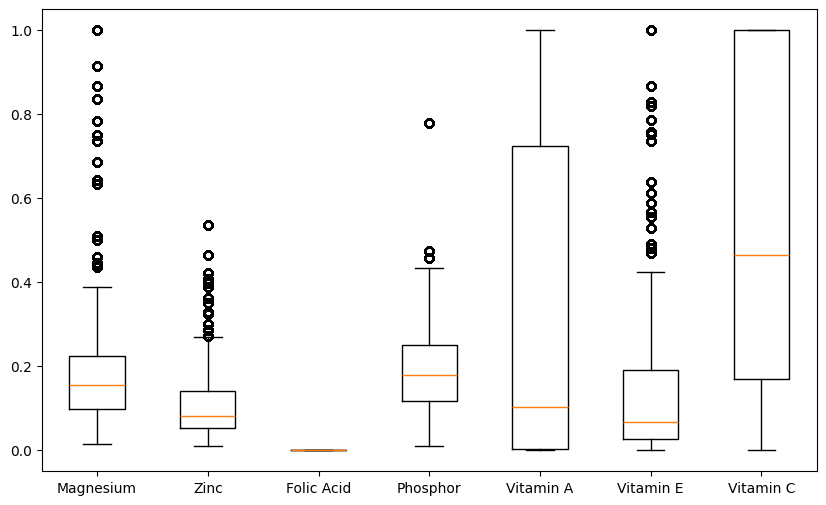

In [93]:
# Nutritional value of cooked vegetables in 100kcal

df_vc_join = pd.merge(df_vegies_cooked, df_food, on='food_group_id', how='left')
data = df_vc_join[['ref_mg_100kcal', 'ref_zn_100kcal', 'ref_fa_100kcal', 'ref_p_100kcal', 'ref_vitA_100kcal', 'ref_vitE_100kcal', 'ref_vitC_100kcal']]

fig = plt.figure(figsize =(6, 3))
 
# Creating axes instance
labels = ['Magnesium', 'Zinc', 'Folic Acid', 'Phosphor', 'Vitamin A', 'Vitamin E', 'Vitamin C']
fig, ax = plt.subplots(figsize=(10, 6))
 
# Creating plot
bp = ax.boxplot(data, labels=labels)
 
# show plot
plt.show()